In [1]:
#dependencies
import pandas as pd
import numpy as np

## EDA

In [2]:
x=pd.read_csv('D:/Data Sets/MOA/lish-moa/train_features.csv')
y=pd.read_csv('D:/Data Sets/MOA/lish-moa/train_targets_scored.csv')

In [3]:
x.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
x.shape

(23814, 876)

In [5]:
y.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.shape

(23814, 207)

In [ ]:
#x dataframe is the feature df that consists of all the features.
#y dataframe is the target df, the ones which we have to predict

In [7]:
null=x.isnull().sum()
c=0
for val in null:
    if val>0:
        c+=1
print(c) #no missing value in any feature

0


In [9]:
x=x.drop('sig_id',axis=1)

In [10]:
x.head()

,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [11]:
y=y.drop('sig_id',axis=1)

In [12]:
y.head()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Analysing categorical variables

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64


<AxesSubplot:xlabel='cp_type', ylabel='count'>

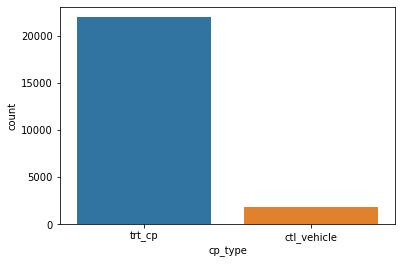

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print(x.cp_type.value_counts())
sns.countplot(x.cp_type)


48    8250
72    7792
24    7772
Name: cp_time, dtype: int64


<AxesSubplot:xlabel='cp_time', ylabel='count'>

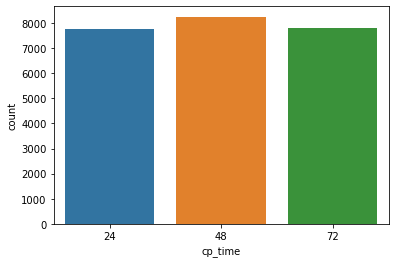

In [23]:
print(x.cp_time.value_counts())
sns.countplot(x.cp_time)

D1    12147
D2    11667
Name: cp_dose, dtype: int64


<AxesSubplot:xlabel='cp_dose', ylabel='count'>

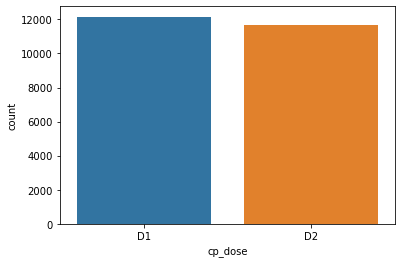

In [24]:
print(x.cp_dose.value_counts())
sns.countplot(x.cp_dose)

In [26]:
x=x.values
y=y.values

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x=oe.fit_transform(x)
x

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 9.4340e+03, 1.0661e+04,
        1.0822e+04],
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 8.7640e+03, 1.2260e+04,
        1.2868e+04],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 6.3010e+03, 2.3400e+03,
        1.2606e+04],
       ...,
       [0.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.3047e+04, 1.2614e+04,
        1.0559e+04],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.2743e+04, 4.0330e+03,
        8.3580e+03],
       [1.0000e+00, 2.0000e+00, 0.0000e+00, ..., 4.6470e+03, 1.8600e+03,
        6.9900e+02]])

### Techniques for solving Multilabel classification 

1. Problem Transformation
2. Adapted Algorithm
3. Ensembles

### Problem Transformation
1. Binary Relevance
2. Classifier Chains
3. Label Powerset

In [25]:
#installing package
pip install scikit-multilearn

  Using cached scikit_multilearn-0.2.0-py3-none-any.whl (89 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\91884\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [30]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Binary  Relevance

In [33]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

classifier=BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
y_pred=classifier.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.028343480999370146

In [38]:
from sklearn.ensemble import RandomForestClassifier

classifier=BinaryRelevance(RandomForestClassifier(verbose=1))

# train
classifier.fit(x_train, y_train)

# predict
y_pred=classifier.predict(x_test)

#score
print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   43.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.4667226537896284


#### Label Powerset 

In [40]:
from skmultilearn.problem_transform import LabelPowerset

classifier=LabelPowerset(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
y_pred=classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.17090069284064666


In [44]:
from sklearn.ensemble import RandomForestClassifier

classifier=LabelPowerset(RandomForestClassifier(n_jobs=3,verbose=1))

# train
classifier.fit(x_train, y_train)

# predict
y_pred=classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    2.2s finished


0.4841486458114634


In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier=LabelPowerset(RandomForestClassifier(n_jobs=5,verbose=1,n_estimators=200))

# train
classifier.fit(x_train, y_train)

# predict
y_pred=classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   43.0s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    5.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    9.2s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    9.3s finished


0.48372874238925045


#### Adapted Algorithms 

In [50]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(n_neighbors=3)

# train
classifier.fit(x_train, y_train)

# predict
y_pred=classifier.predict(x_test)

print(accuracy_score(y_test,y_pred))

C:\Users\91884\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.4709216880117573


#### Ensembles

In [48]:
from sklearn.naive_bayes import GaussianNB
from skmultilearn.ensemble import RakelD

classifier = RakelD(
    base_classifier=GaussianNB(),
    base_classifier_require_dense=[True, True],
    labelset_size=206
)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.17090069284064666


In [49]:
from skmultilearn.ensemble import RakelD
from sklearn.ensemble import RandomForestClassifier

classifier = RakelD(
    base_classifier=RandomForestClassifier(n_jobs=5,verbose=1,n_estimators=200),
    base_classifier_require_dense=[True, True],
    labelset_size=206
)

classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(accuracy_score(y_test,y_pred))

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   41.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    3.1s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:    8.8s
[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:    8.9s finished


0.48309888725593114
